# ApacheSpark

In [1]:
import findspark
findspark.init()

import pyspark
sc = pyspark.SparkContext(appName="rdd")

22/02/03 01:42:30 WARN Utils: Your hostname, IFernandes resolves to a loopback address: 127.0.1.1; using 192.168.249.76 instead (on interface eth0)
22/02/03 01:42:30 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/02/03 01:42:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
rdd = sc.parallelize(range(100)) # saved in ApacheSpark memory - best solution
rdd2 = range(100) # saved in local driver - worse solution for parallelization

In [5]:
## USEFUL HINTS
df2 = spark.sql("SELECT CLASS from df") # new query to select data
df3 = df.select('province','city','infection_case','confirmed') # select a subset of the data
df_pandas = df.toPandas() # convert a ApacheSpark dataframe to Pandas dataframe
df = df.withColumnRenamed("infection_case","infection_source") # change column name


AnalysisException: Table or view not found: df; line 1 pos 18;
'Project ['CLASS]
+- 'UnresolvedRelation [df], [], false


## Functional programming
lambda functions, applying a function to a set of data. \
then parallelization takes place by taken sub samples of this list and processing them at different nodes/cores.

In [12]:
# functional programming
rdd = sc.parallelize(range(100))
rdd.map(lambda x: x+1)

PythonRDD[7] at RDD at PythonRDD.scala:53

In [15]:
rdd.take(10), rdd.map(lambda x: x+1).take(10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [17]:
sc.parallelize(range(1,101)).reduce(lambda a,b: a+b)

5050

## RDD - Resilient Distributed Dataset and DataFrames

ApacheSparkSQL

In [ ]:
# accessing cloudant from ApacheSpark
cloudantdata = sparSession.read.format("com.cloudant.spark").\
option("cloudant.host", ""). \
option("cloudant.username", ""). \
option("cloudant.password", ""). \
load("device_name")

In [ ]:
cloudantdata.count()

In [ ]:
cloudantdata.createOrReplaceTempView("device_name")
sqlDF = spark.sql("SELECT * FROM device_name")
sqlDF.show()

## Math and Statistics on ApacheSpark

In [4]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
    
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [6]:
import random
rddX = sc.parallelize(random.sample(list(range(100)),100))
rddY = sc.parallelize(random.sample(list(range(100)),100))

In [7]:
meanX = rddX.sum()/float(rddX.count())
meanY = rddY.sum()/float(rddY.count())
print (meanX, rddX.mean())
print (meanY)

49.5 49.5
49.5


In [131]:
# standard deviation
import math
stdd = math.sqrt(rdd.map(lambda x: pow(x-meanX,2)).sum()/n)

In [132]:
# skewness
rdd.map(lambda x: pow(x-meanX,3)/pow(stdd,3)).sum()/n

# kurtosis - shape of the data and outliers content within the data
kurt = rdd.map(lambda x: pow(x-meanX,4)/pow(stdd,4)).sum()/n
kurt

1.7997599759975997

In [135]:
# Covariance and correlation
n = rddXY.count()
## covariance
rddXY = rddX.zip(rddY)
covXY = rddXY.map(lambda x_y : (x_y[0]-meanX)*(x_y[1]-meanY)).sum()/n
covXY

## correlation: corr = covarXY / (stdX * stdY)
from math import sqrt
stdX = sqrt(rddX.map(lambda x : pow(x-meanX,2)).sum()/n)
stdY = sqrt(rddY.map(lambda x : pow(x-meanY,2)).sum()/n)
print (stdX, stdY)

corrXY = covXY / (stdX*stdY)
corrXY

28.86607004772212 28.86607004772212


0.04537653765376538

In [158]:
## Correlation matrix
column1 = sc.parallelize(range(100))
column2 = sc.parallelize(range(100,200))
column3 = sc.parallelize(list(reversed(range(100))))
import random
column4 = sc.parallelize(random.sample(range(100),100))

data = column1.zip(column2).zip(column3).zip(column4).map(lambda a_b_c_d : (a_b_c_d[0][0][0],a_b_c_d[0][0][1],a_b_c_d[0][1],a_b_c_d[1]).map(lambda a_b_c_d : [a_b_c_d[0],a_b_c_d[1],a_b_c_d[2],a_b_c_d[3]])) 
#data.map(lambda a_b_c_d : [a_b_c_d[0],a_b_c_d[1],a_b_c_d[2],a_b_c_d[3]]).take(10)
from pyspark.mllib.stat import Statistics
print(Statistics.corr(data))


In [125]:
a =[1,2,3,4,5,6,7,8,9,10]
b = [7,6,5,4,5,6,7,8,9,10]
import pandas as pd
di = {"d1":a,"d2":b}
data = pd.DataFrame(di)
data.corr(), data.cov()

(          d1        d2
 d1  1.000000  0.709273
 d2  0.709273  1.000000,
           d1        d2
 d1  9.166667  4.055556
 d2  4.055556  3.566667)

### ApacheSpark run test

In [ ]:
import findspark
findspark.init()

import pyspark
import random

sc = pyspark.SparkContext(appName="Pi")

num_samples = 100000000

def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1

count = sc.parallelize(range(0, num_samples)).filter(inside).count()

pi = 4 * count / num_samples
print(pi)

sc.stop()

# Plotting with ApacheSpark and matplotlib

In [172]:
%matplotlib inline
# sampling is important when plotting big datasets
df = spark.read.parquet('./Assignments/washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

## Boxplot

In [171]:
voltage = spark.sql("SELECT voltage from washing where voltage is not null")
# voltage.collect() # this is encapsulated as a wrong data type for python and for visualization. Do it as follow:
voltage.rdd.map(lambda row: row.voltage).collect()
# sampling.. not necessary now, but might be necessary for some big data 
voltage_array = voltage.rdd.map(lambda row: row.voltage).sample(False, 0.10).collect()
voltage_array

[228,
 234,
 224,
 233,
 228,
 229,
 224,
 226,
 225,
 234,
 235,
 235,
 227,
 220,
 237,
 224,
 223,
 237,
 229,
 224,
 237,
 226,
 226,
 221,
 225,
 233,
 246,
 224,
 223,
 223,
 226,
 232,
 232,
 235,
 227,
 238,
 238,
 224,
 220,
 242,
 221,
 220,
 227]

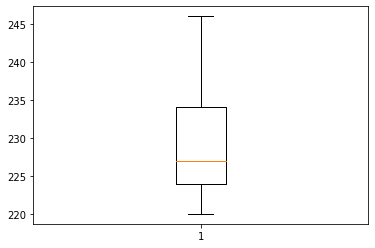

In [174]:
import matplotlib.pyplot as plt
plt.boxplot(voltage_array)
plt.show()

## Runchart - time series

In [197]:
voltageTS = spark.sql("SELECT voltage, ts from washing where voltage is not null ORDER BY ts ASC") # select voltage and time stamp
# it is always good practice to sort values by time stamp again to make sure they are in the correct order

### visualize what's happening
# voltageTS_array = voltageTS.rdd.sample(False,0.10).map(lambda row: (row.ts, row.voltage)).collect() # used to visualize if the data is correctly processed
# voltageTS_array

voltageTS_rdd = voltageTS.rdd.sample(False,0.10).map(lambda row: (row.ts, row.voltage))
voltage_array = voltageTS_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
ts_array = voltageTS_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()

voltage_array, ts_array

([238,
  227,
  235,
  221,
  236,
  238,
  230,
  236,
  229,
  226,
  224,
  232,
  233,
  220,
  233,
  223,
  236,
  231,
  236,
  224,
  234,
  234,
  235,
  230,
  221,
  229,
  220,
  229,
  220,
  223,
  232,
  222,
  226,
  236,
  247,
  238,
  238,
  235,
  227,
  237,
  230,
  223,
  223],
 [1547808791957,
  1547808830981,
  1547808864037,
  1547808900085,
  1547808912091,
  1547808930101,
  1547808945126,
  1547808948129,
  1547808984163,
  1547809056219,
  1547809083238,
  1547809101247,
  1547809113256,
  1547809128263,
  1547809134265,
  1547809155272,
  1547809233344,
  1547809266373,
  1547809350411,
  1547809380431,
  1547809440473,
  1547809458483,
  1547809500510,
  1547809512522,
  1547809518524,
  1547809527533,
  1547809623592,
  1547809695646,
  1547809746685,
  1547809791714,
  1547809803719,
  1547809857745,
  1547809866750,
  1547809875752,
  1547809905769,
  1547809947789,
  1547809953793,
  1547809959796,
  1547809986805,
  1547809989809,
  1547810001814,
 

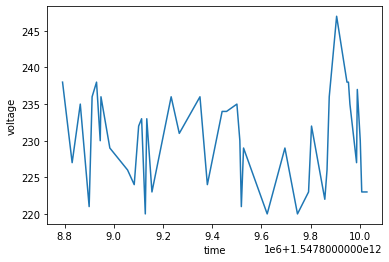

In [198]:
plt.plot(ts_array, voltage_array)
plt.xlabel('time')
plt.ylabel('voltage')
plt.show()

## PCA - dimensionality reduction

In [199]:
result = spark.sql("""
SELECT * from (
    SELECT
    min(temperature) over w as min_temperature,
    max(temperature) over w as max_temperature, 
    min(voltage) over w as min_voltage,
    max(voltage) over w as max_voltage,
    min(flowrate) over w as min_flowrate,
    max(flowrate) over w as max_flowrate,
    min(frequency) over w as min_frequency,
    max(frequency) over w as max_frequency,
    min(hardness) over w as min_hardness,
    max(hardness) over w as max_hardness,
    min(speed) over w as min_speed,
    max(speed) over w as max_speed
    FROM washing 
    WINDOW w AS (ORDER BY ts ROWS BETWEEN CURRENT ROW AND 10 FOLLOWING) 
)
WHERE min_temperature is not null 
AND max_temperature is not null
AND min_voltage is not null
AND max_voltage is not null
AND min_flowrate is not null
AND max_flowrate is not null
AND min_frequency is not null
AND max_frequency is not null
AND min_hardness is not null
AND min_speed is not null
AND max_speed is not null   
""")

Now we import some classes from SparkML. PCA for the actual algorithm. Vectors for the data structure expected by PCA and VectorAssembler to transform data into these vector structures.

In [200]:
from pyspark.ml.feature import PCA #
from pyspark.ml.linalg import Vectors # 
from pyspark.ml.feature import VectorAssembler # convert python array to a Spark Vector

In [201]:
# Let's define a vector transformation helper class which takes all our input features (result.columns)
# and created one additional column called "features" which contains all our input features as one 
# single column wrapped in "DenseVector" objects
assembler = VectorAssembler(inputCols=result.columns, outputCol="features")

In [207]:
# transform the data
features = assembler.transform(result)
features.rdd.map(lambda r : r.features).take(10) # a list of DenseVector objects, which is a subtype of Vector. Used to save space

22/01/30 22:06:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/01/30 22:06:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/01/30 22:06:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


[DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 71.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 80.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 72.0, 80.0, 1033.0, 1046.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0])]

In [206]:
features

DataFrame[min_temperature: bigint, max_temperature: bigint, min_voltage: bigint, max_voltage: bigint, min_flowrate: bigint, max_flowrate: bigint, min_frequency: bigint, max_frequency: bigint, min_hardness: bigint, max_hardness: bigint, min_speed: bigint, max_speed: bigint, features: vector]

In [208]:
# reduce the dimensionality to 3
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(features)

22/01/30 22:07:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/01/30 22:07:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/01/30 22:07:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/01/30 22:07:42 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/01/30 22:07:42 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
22/01/30 22:07:43 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
22/01/30 22:07:43 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


In [209]:
# transform the data
result_pca = model.transform(features).select("pcaFeatures")
result_pca.show(truncate=False)

22/01/30 22:07:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/01/30 22:07:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/01/30 22:07:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------------------------------------------------------+
|pcaFeatures                                               |
+----------------------------------------------------------+
|[1459.9789705815301,18.7452377818137,70.78430794789449]   |
|[1459.9954818287874,19.113431461685494,70.72738871418574] |
|[1460.0895843562396,20.96947106295569,70.75630600314616]  |
|[1469.69939294206,20.4031246476478,62.01356967480217]     |
|[1469.7159041893176,20.771318327519595,61.956650441093416]|
|[1469.7128317339768,20.7907511172548,61.89610667824968]   |
|[1478.353026457406,20.294557029761734,71.67550104802774]  |
|[1478.353026457406,20.294557029761734,71.67550104802774]  |
|[1478.3686036139297,20.260626897669283,71.63355353599673] |
|[1478.3686036139297,20.260626897669283,71.63355353599673] |
|[1483.5412027685188,20.006222577534125,66.82710394276796] |
|[1483.5171090224458,20.867020421616665,66.86707301946433] |
|[1483.4224268544053,19.875748236687734,66.93027077907936] |
|[1483.4224268544053,19.

In [220]:
# transform a list of 3 DenseVectors into a numpy array for each feature
# this cell shows what happens for the following cell, separating x y and z features
rdd = result_pca.rdd.sample(False,0.8)
rdd # list of each row containing a pcaFeatures and DenseVector
# rdd.map(lambda a: a.pcaFeatures).collect() # list of denseVectors
rdd.map(lambda a: a.pcaFeatures).map(lambda a: a[0]).collect() # first feature. Do the same for a[1] and a[2]

[1460.0895843562396,
 1469.69939294206,
 1469.7159041893176,
 1469.7128317339768,
 1478.353026457406,
 1478.353026457406,
 1478.3686036139297,
 1478.3686036139297,
 1483.5412027685188,
 1483.5171090224458,
 1483.4224268544053,
 1483.4224268544053,
 1488.103073547386,
 1488.1076926850799,
 1488.013590157628,
 1465.1644738448076,
 1465.1644738448076,
 1465.111030381531,
 1439.950185464044,
 1440.011559999406,
 1440.012085793612,
 1440.012085793612,
 1440.012085793612,
 1436.6021702663402,
 1436.5551190026144,
 1432.8614201814582,
 1432.9089972393901,
 1455.1159130656645,
 1455.1184792532722,
 1455.183142037829,
 1455.3713470927328,
 1475.502023979469,
 1475.4892395803677,
 1475.4892395803677,
 1479.9378089491597,
 1479.9378089491597,
 1479.9429942106417,
 1483.9691295879888,
 1483.9670766379027,
 1483.8548590085616,
 1483.8549413184562,
 1453.6796955303842,
 1453.820849321562,
 1453.7713155797896,
 1420.4747066160387,
 1420.4720776450092,
 1420.438913126031,
 1420.438913126031,
 1481.833

In [221]:
print("PCA count: ", result_pca.count())

# obtain a sample of each feature and pass it to a python list
rdd = result_pca.rdd.sample(False,0.8)
x = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[0]).collect()
y = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[1]).collect()
z = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[2]).collect()
z

22/01/30 22:17:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/01/30 22:17:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


PCA count:  2051


[70.78430794789449,
 70.72738871418574,
 62.01356967480217,
 61.956650441093416,
 61.89610667824968,
 71.67550104802774,
 71.63355353599673,
 71.63355353599673,
 66.82710394276796,
 66.86707301946433,
 66.93027077907936,
 66.93027077907936,
 72.162618263578,
 72.2762160559929,
 72.24729876703248,
 47.06072898267587,
 70.01793819961802,
 69.8651198731717,
 69.87662522599601,
 69.87662522599601,
 66.11188119411338,
 66.09742254963317,
 66.08296390515295,
 69.66544701320504,
 69.63149359679664,
 69.65745759410117,
 49.51522333890409,
 49.46247640184731,
 71.70071776886732,
 71.72654619366244,
 71.72654619366244,
 71.64193462653714,
 67.62073799940663,
 67.62073799940663,
 67.62563768176449,
 72.06171903958432,
 72.0112311318444,
 71.897392664427,
 71.97178907464718,
 71.98027742874922,
 38.653737229059175,
 38.69711316249982,
 69.05481057512566,
 68.99728381100408,
 68.91739780911678,
 68.91739780911678,
 13.290844467144211,
 13.291397348254009,
 13.27061444934202,
 74.61094150354324,
 74

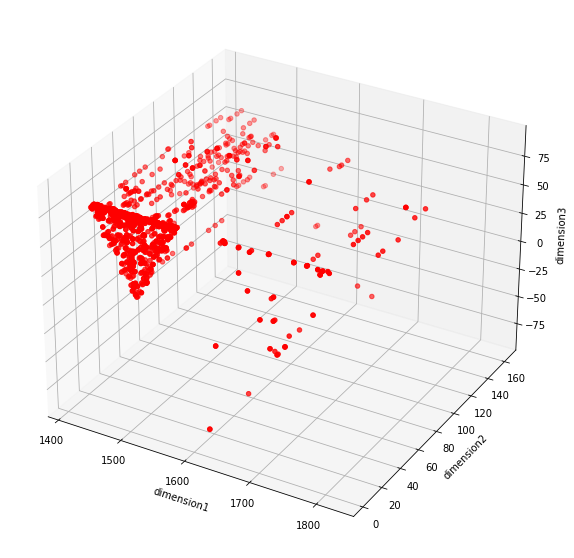

In [223]:
# plotting
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize= (10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel('dimension1')
ax.set_ylabel('dimension2')
ax.set_zlabel('dimension3')

plt.show()